In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import yfinance as yf

In [6]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [7]:
stock = 'GOOG'
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [9]:
google_data.shape

(5018, 6)

In [10]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5.018000e+03
mean,45.201131,45.678244,44.750719,45.224208,45.174166,1.157946e+08
std,43.274278,43.753787,42.853939,43.312660,43.267753,1.498096e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,13.032339,13.143298,12.879848,13.029474,13.014664,2.735373e+07
50%,26.980750,27.191672,26.786916,26.997500,26.966813,5.619303e+07
75%,60.199501,60.651376,59.785451,60.273501,60.204991,1.425594e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [11]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5018 entries, 2004-08-19 to 2024-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5018 non-null   float64
 1   High       5018 non-null   float64
 2   Low        5018 non-null   float64
 3   Close      5018 non-null   float64
 4   Adj Close  5018 non-null   float64
 5   Volume     5018 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 274.4 KB


In [12]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

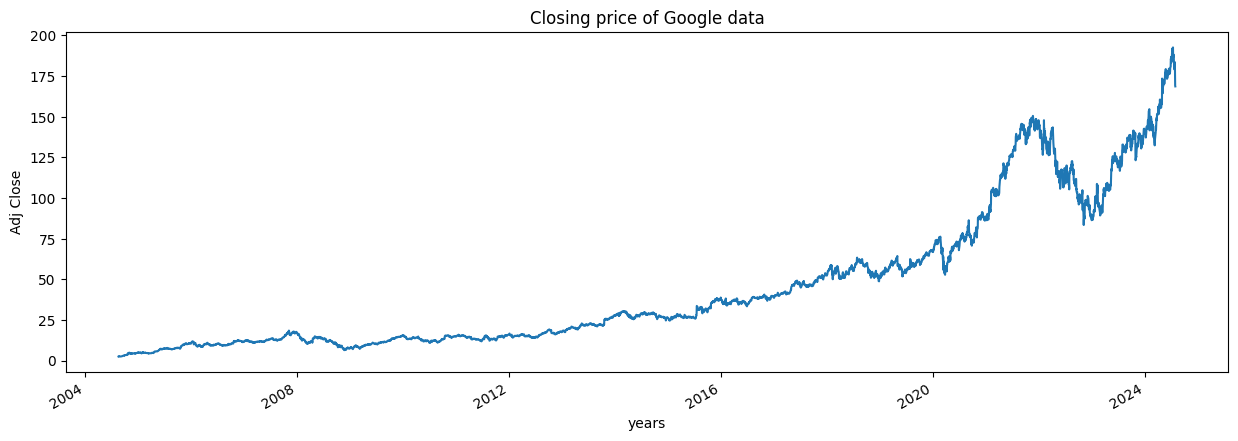

In [14]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [15]:
def plot_graph(figsize, values, column_name ):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [16]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

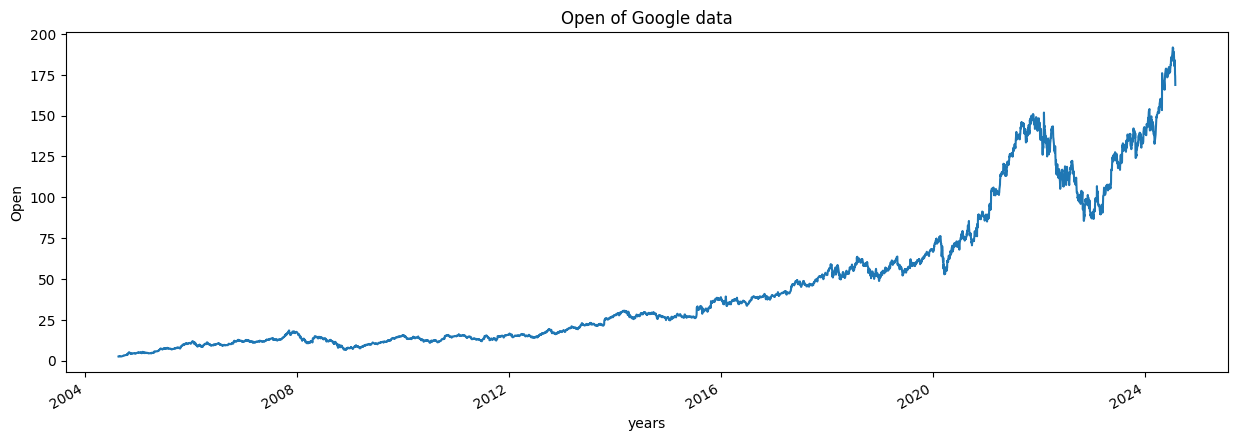

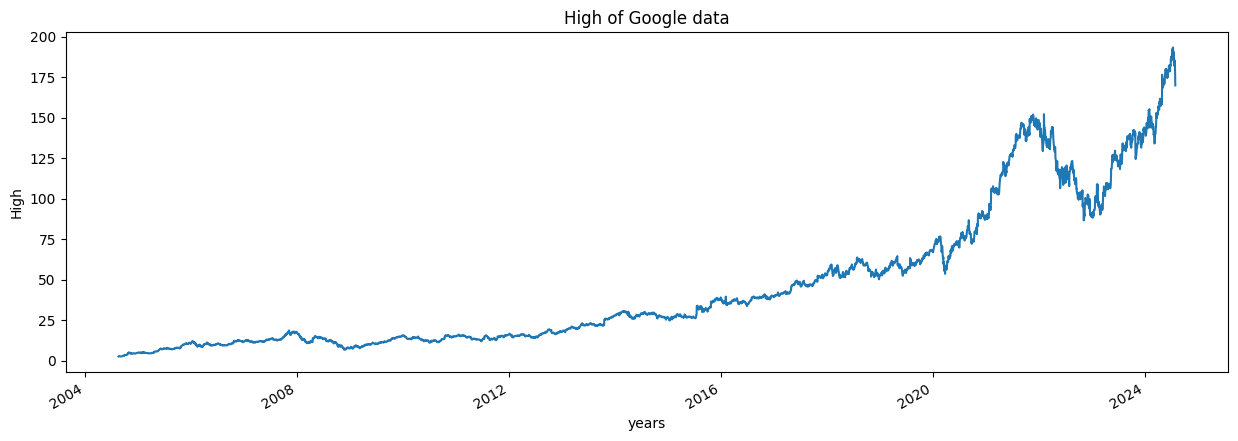

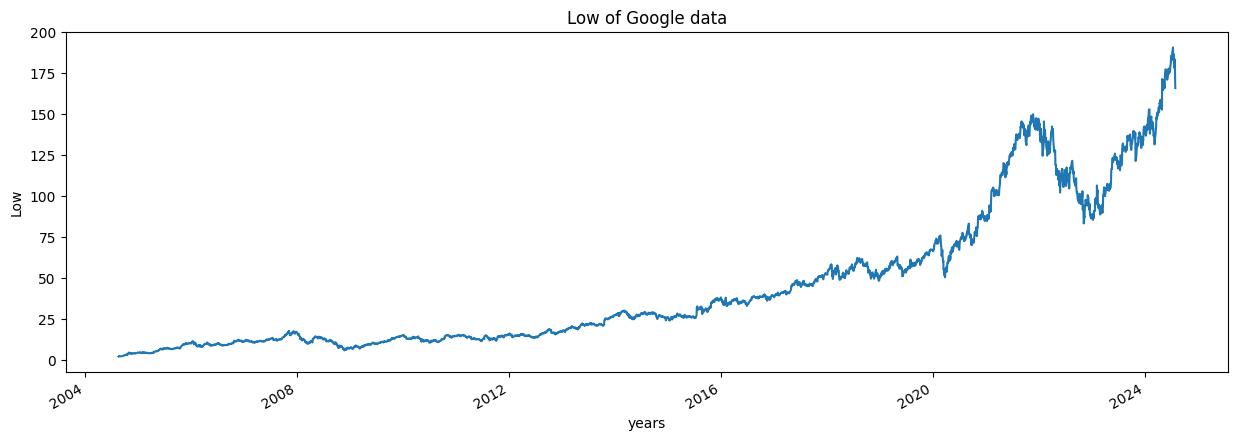

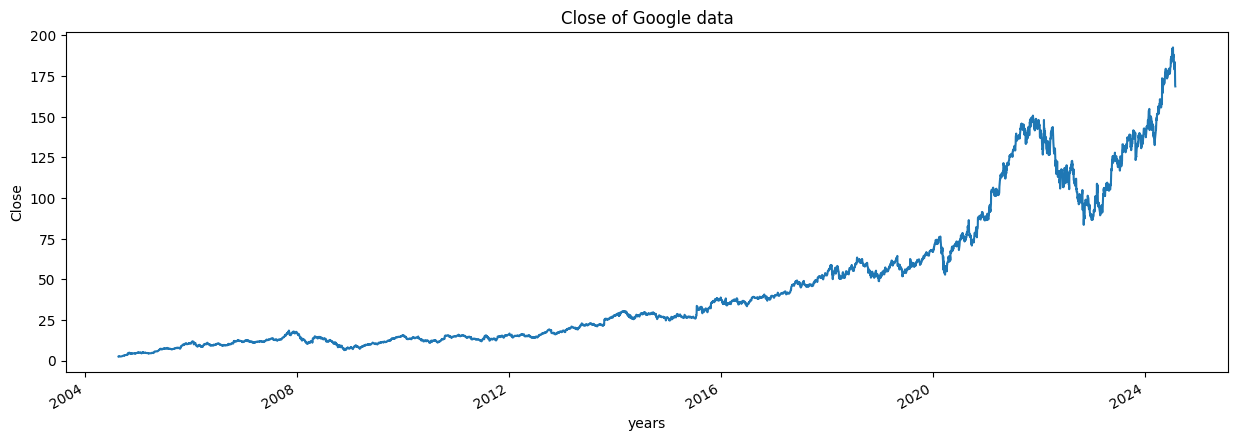

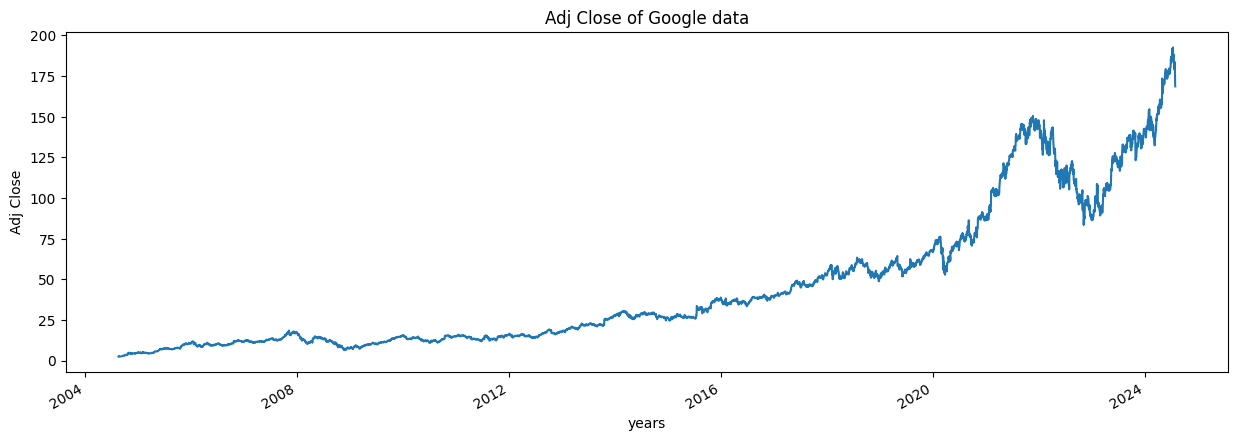

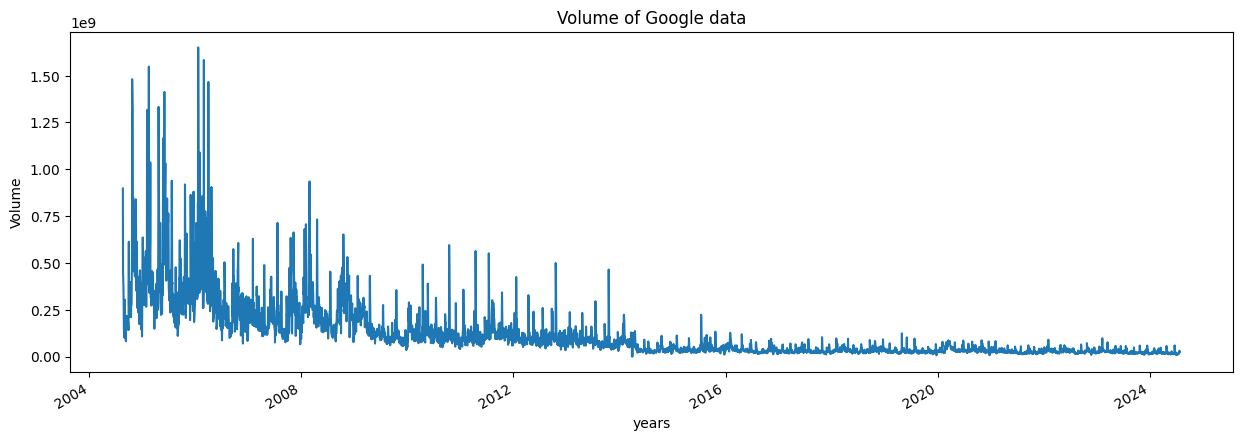

In [17]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [18]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [19]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [20]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [21]:
for i in range(2004,2025):
    print(i, list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 143


In [22]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [23]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_for_250_days, dtype: float64

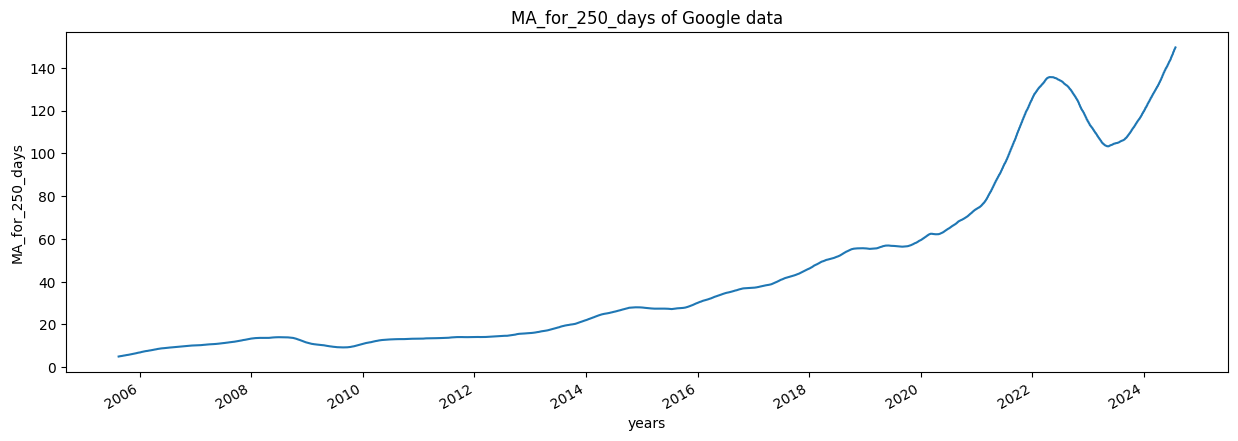

In [24]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

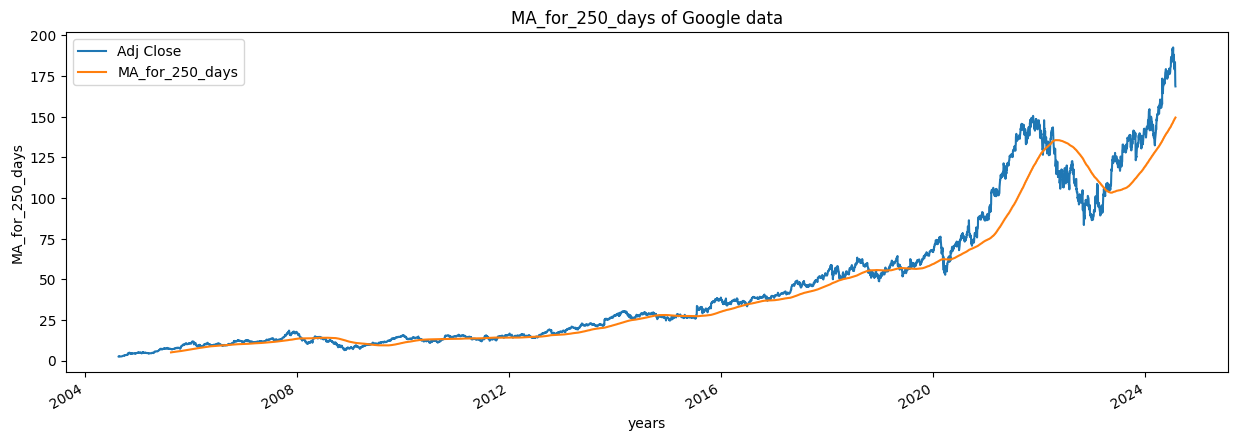

In [25]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

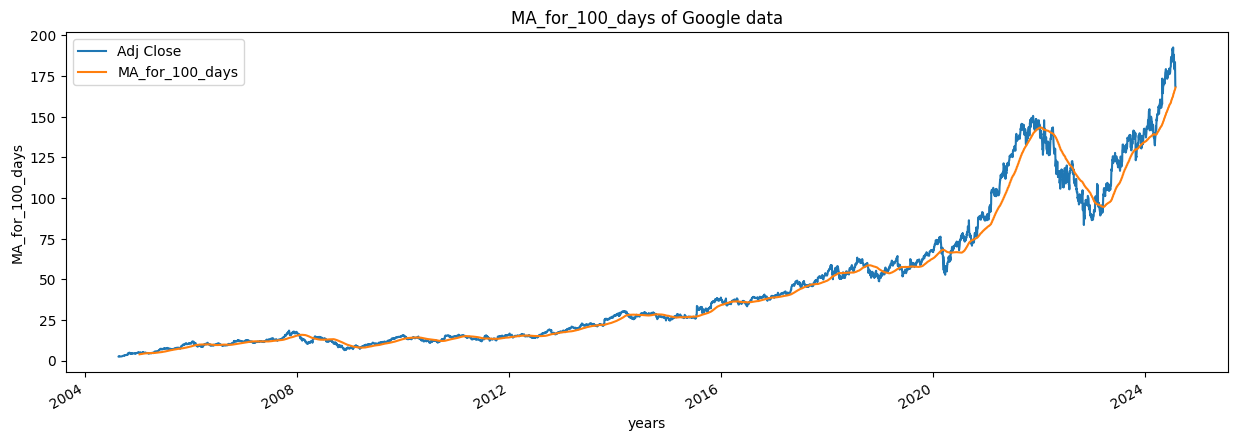

In [26]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

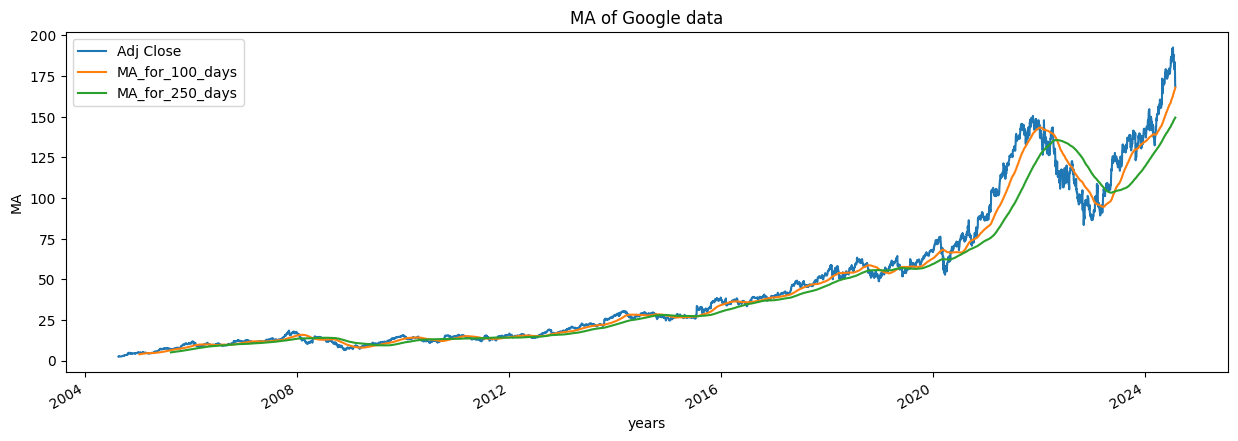

In [27]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

In [28]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


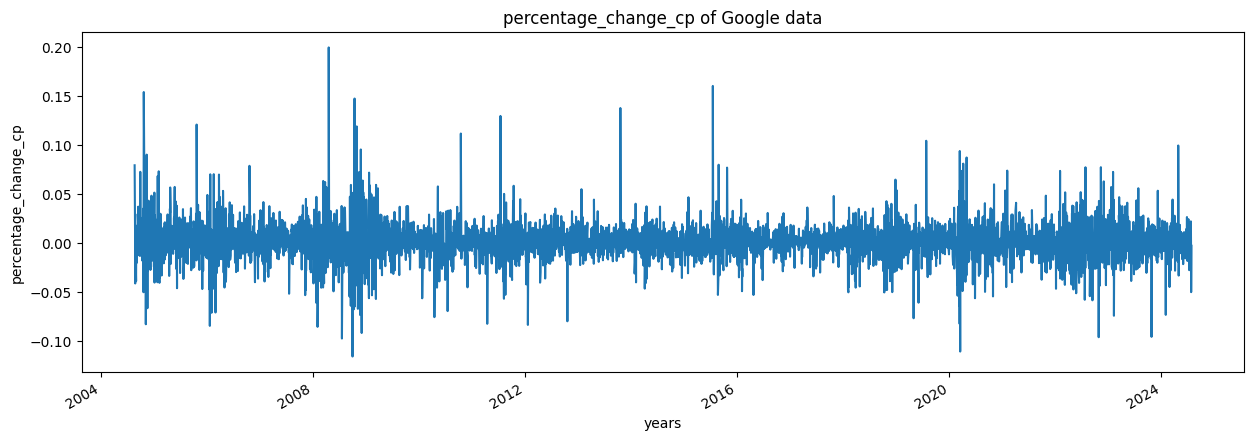

In [29]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change_cp')

In [30]:
Adj_close_price = google_data[['Adj Close']]

In [31]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [32]:
from sklearn.preprocessing import MinMaxScaler 

In [33]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [9.03823822e-01],
       [8.76427604e-01],
       [8.73903515e-01]])

In [34]:
len(scaled_data)

5018

In [35]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [36]:
x_data[0],y_data[0]

(array([[4.31749279e-05],
        [1.08581220e-03],
        [1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.3

In [37]:
int(len(x_data)*0.7)

3442

In [38]:
4990-100-int(len(x_data)*0.7)

1448

In [39]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3442, 100, 1)
(3442, 1)
(1476, 100, 1)
(1476, 1)


In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\incha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
model.fit(x_train,y_train, batch_size=32, epochs = 4)

Epoch 1/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 9.8692e-04
Epoch 2/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - loss: 2.1776e-05
Epoch 3/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - loss: 2.0761e-05
Epoch 4/4
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 2.0144e-05


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [46]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [47]:
predictions

array([[0.30479246],
       [0.3035054 ],
       [0.30245516],
       ...,
       [0.9593313 ],
       [0.95389915],
       [0.9458028 ]], dtype=float32)

In [48]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 60.451054],
       [ 60.206287],
       [ 60.00656 ],
       ...,
       [184.92595 ],
       [183.89291 ],
       [182.35323 ]], dtype=float32)

In [49]:
y_test

array([[0.29558316],
       [0.29484783],
       [0.29051986],
       ...,
       [0.90382382],
       [0.8764276 ],
       [0.87390351]])

In [50]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_train = scaler.inverse_transform(y_train)
inv_y_test

array([[ 58.6996994 ],
       [ 58.55986023],
       [ 57.73680115],
       ...,
       [174.36999512],
       [169.16000366],
       [168.67999268]])

In [51]:
rmse = np.sqrt(np.mean((inv_predictions-inv_y_test)**2))

In [52]:
rmse

3.759294111045585

In [53]:
plotting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1),
    } ,
        index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,Original_test_data,predictions
Date,,
2018-09-13,58.699699,60.451054
2018-09-14,58.559860,60.206287
2018-09-17,57.736801,60.006561
2018-09-18,57.995007,59.796833
2018-09-19,58.487946,59.609459


<Figure size 640x480 with 0 Axes>

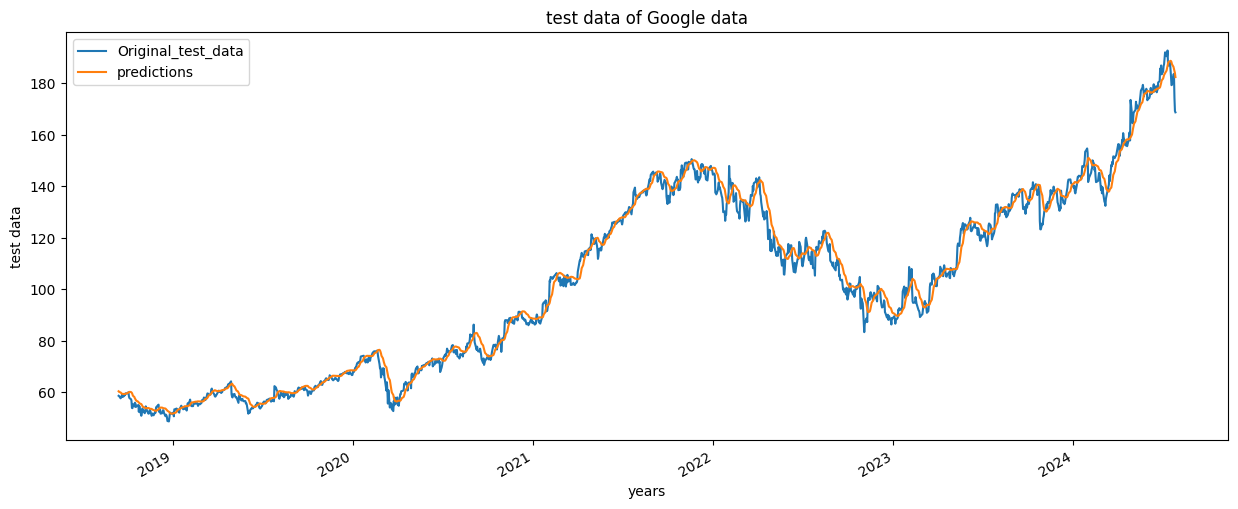

In [54]:
plot_graph((15,6), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

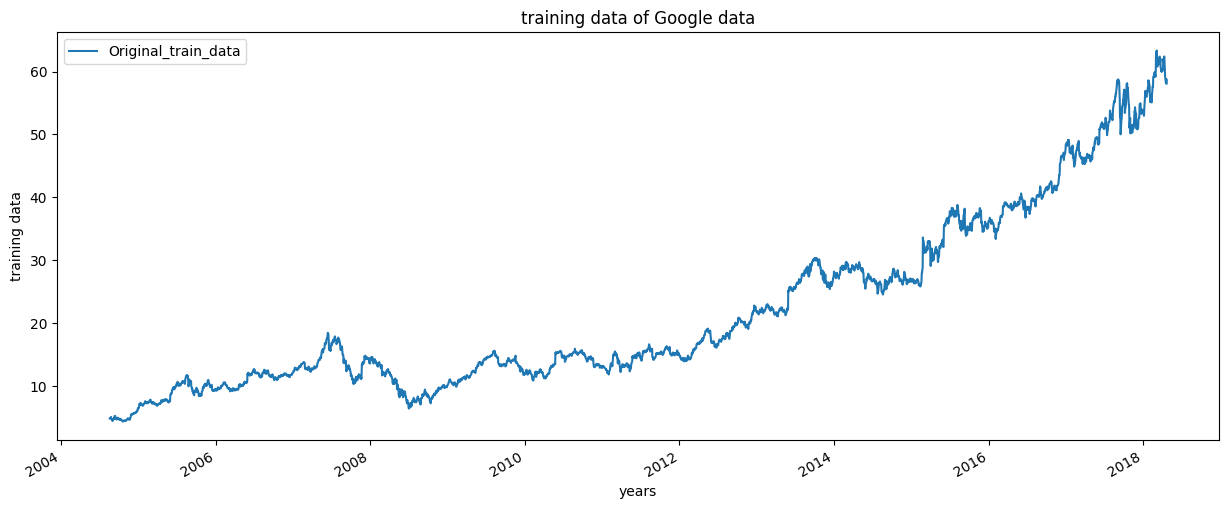

In [55]:
training_data = pd.DataFrame(
    {
        'Original_train_data': inv_y_train.reshape(-1)
    } ,
        index = google_data.index[:splitting_len]
)
plotting_data.head()


plot_graph((15,6), training_data, 'training data')

<Figure size 640x480 with 0 Axes>

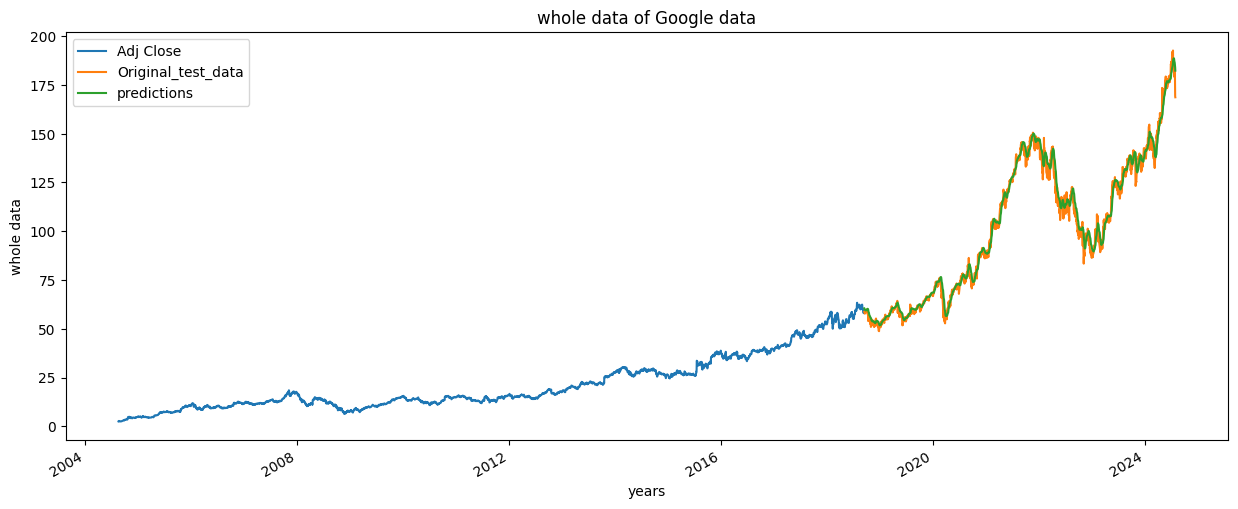

In [56]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100], plotting_data], axis=0), 'whole data')

In [57]:
import time
import yfinance as yf
import numpy as np
from datetime import timedelta

def online_learning(model, new_data, scaler):
    start_time = time.time()
    
    # Prepare the new data
    scaled_new_data = scaler.transform(new_data)
    x_new = scaled_new_data[:-1].reshape(1, -1, 1)
    y_new = scaled_new_data[-1].reshape(1, 1)
    
    # Make a prediction
    prediction_start = time.time()
    prediction = model.predict(x_new)
    prediction_duration = time.time() - prediction_start
    
    # Update the model
    model_start = time.time()
    model.fit(x_new, y_new, epochs=1, verbose=0)
    model_duration = time.time() - model_start
    
    total_duration = time.time() - start_time
    
    print(f"Prediction time: {prediction_duration:.2f} seconds")
    print(f"Model training time: {model_duration:.2f} seconds")
    print(f"Total online learning time: {total_duration:.2f} seconds")
    
    return scaler.inverse_transform(prediction)[0][0]

def update_data_and_model(stock, model, scaler, last_100_days):
    start_time = time.time()
    
    # Fetch the latest data
    fetch_start = time.time()
    end = datetime.now()
    start = end - timedelta(days=1)
    new_data = yf.download(stock, start, end)
    fetch_duration = time.time() - fetch_start
    
    if not new_data.empty:
        new_close = new_data['Adj Close'].values[-1]
        last_100_days = np.append(last_100_days[1:], new_close)
        
        # Perform online learning
        prediction = online_learning(model, last_100_days.reshape(-1, 1), scaler)
        
        print(f"New data point: {new_close}")
        print(f"Predicted next price: {prediction}")
    
    total_duration = time.time() - start_time
    
    print(f"Data fetching time: {fetch_duration:.2f} seconds")
    print(f"Total update time: {total_duration:.2f} seconds")

    return last_100_days


In [58]:
last_100 = google_data[['Adj Close']].tail(100) 
last_100.tail()

,Adj Close
Date,
2024-07-22,183.350006
2024-07-23,183.600006
2024-07-24,174.369995
2024-07-25,169.160004
2024-07-26,168.679993


In [59]:
last_100 = scaler.fit_transform(last_100['Adj Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100


array([[[0.02022571],
        [0.        ],
        [0.04443055],
        [0.06183753],
        [0.10577069],
        [0.11704384],
        [0.13610938],
        [0.19529432],
        [0.15931894],
        [0.26392896],
        [0.25464514],
        [0.28382316],
        [0.26823962],
        [0.31847224],
        [0.30819364],
        [0.31731183],
        [0.32129072],
        [0.32659565],
        [0.39688836],
        [0.38644387],
        [0.39473316],
        [0.32129072],
        [0.35444763],
        [0.39092015],
        [0.42407706],
        [0.41611953],
        [0.46800971],
        [0.44148454],
        [0.39407013],
        [0.38859907],
        [0.40318833],
        [0.41280366],
        [0.38395716],
        [0.42092707],
        [0.45358658],
        [0.47314927],
        [0.42092707],
        [0.68187193],
        [0.5858827 ],
        [0.53183707],
        [0.54725498],
        [0.59516678],
        [0.60395346],
        [0.6178792 ],
        [0.67010114],
        [0

In [60]:
last_100.shape

(1, 100, 1)

In [61]:
day_101 = model.predict(last_100)
day_101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.79944974]], dtype=float32)

In [62]:
scaler.inverse_transform(day_101)

array([[180.5767]], dtype=float32)

In [63]:
import numpy as np


def predict_future_stock(no_of_days, prev_100):
    future_predictions = []
    prev_100 = scaler.fit_transform(prev_100['Adj Close'].values.reshape(-1,1)).reshape(1,-1,1)
    for _ in range(no_of_days):
        next_day = model.predict(prev_100)[0, 0]  
        future_predictions.append(next_day)
        prev_100 = np.append(prev_100[:, 1:, :], [[[next_day]]], axis=1)  
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

In [64]:
no_of_days = 10  
future_results = predict_future_stock(no_of_days, prev_100= google_data[['Adj Close']].tail(100))
print(future_results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[180.5767  179.44623 178.74445 178.32454 178.08623 177.96312 177.91212
 177.90578 177.92679 177.96454]


Text(0.5, 1.0, 'Future Close price of Google stock')

<Figure size 640x480 with 0 Axes>

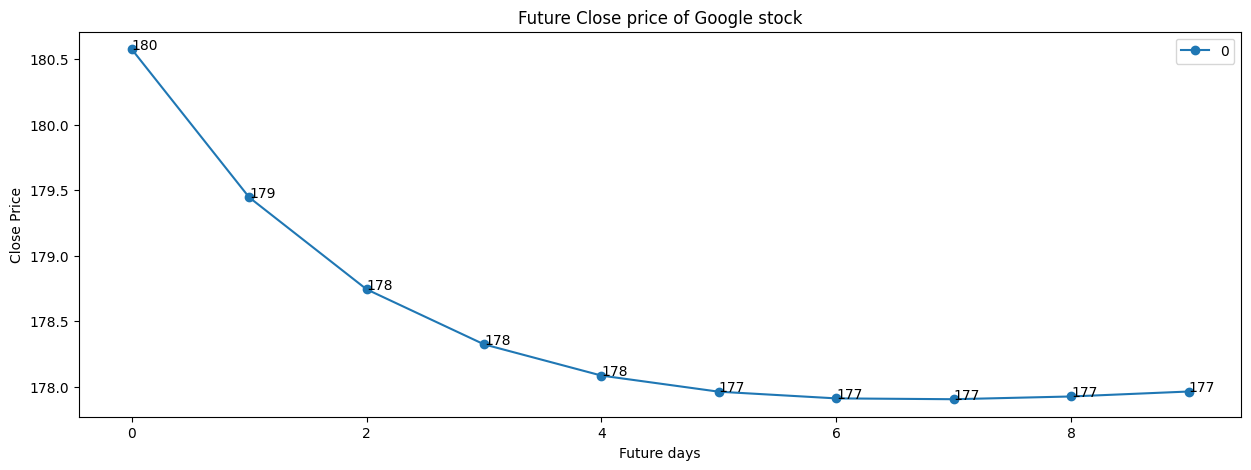

In [65]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i, future_results[i], int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close Price')
plt.title("Future Close price of Google stock")

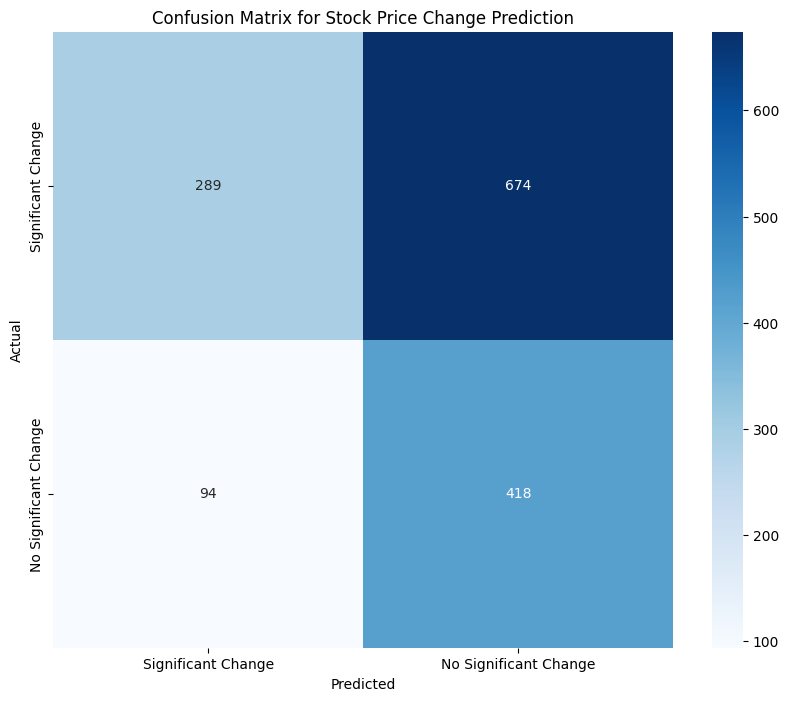

Accuracy: 0.48
Precision: 0.75
Recall: 0.30
F1 Score: 0.43


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we already have inv_predictions and inv_y_test

# Define thresholds for what we consider a significant change
threshold_percentage = 0.01  # 1% change

# Calculate actual and predicted daily changes
actual_changes = np.diff(inv_y_test.flatten())
predicted_changes = np.diff(inv_predictions.flatten())

# Create our "confusion matrix"
confusion_matrix = np.zeros((2, 2))

for actual, predicted in zip(actual_changes, predicted_changes):
    actual_significant = abs(actual) >= threshold_percentage * inv_y_test[0]
    predicted_significant = abs(predicted) >= threshold_percentage * inv_y_test[0]
    
    if actual_significant and predicted_significant:
        confusion_matrix[0, 0] += 1  # True Positive
    elif actual_significant and not predicted_significant:
        confusion_matrix[0, 1] += 1  # False Negative
    elif not actual_significant and predicted_significant:
        confusion_matrix[1, 0] += 1  # False Positive
    else:
        confusion_matrix[1, 1] += 1  # True Negative

# Create labels
labels = ['Significant Change', 'No Significant Change']

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Stock Price Change Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print accuracy
total = np.sum(confusion_matrix)
accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / total
print(f"Accuracy: {accuracy:.2f}")

# Print additional metrics
precision = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[1, 0])
recall = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

In [ ]:



model.save("Latest_stcok_price_model.keras")